In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn 
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

In [5]:
train=pd.read_csv("C:/Users/MYCOM/data/housepricing_train.csv")
test=pd.read_csv("C:/Users/MYCOM/data/housepricing_test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# check the numbers of samples and features
print('The train data size before dropping Id feature is: {}'.format(train.shape))
print('The test data size before dropping Id feature is: {}'.format(test.shape))
train_ID=train['Id']
test_ID=test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
print('\n The train data size after dropping Id feature is: {}'.format(train.shape))
print('\n The test data size after dropping Id feature is: {}'.format(test.shape))

The train data size before dropping Id feature is: (1460, 81)
The test data size before dropping Id feature is: (1459, 80)

 The train data size after dropping Id feature is: (1460, 80)

 The test data size after dropping Id feature is: (1459, 79)


## Data Processing

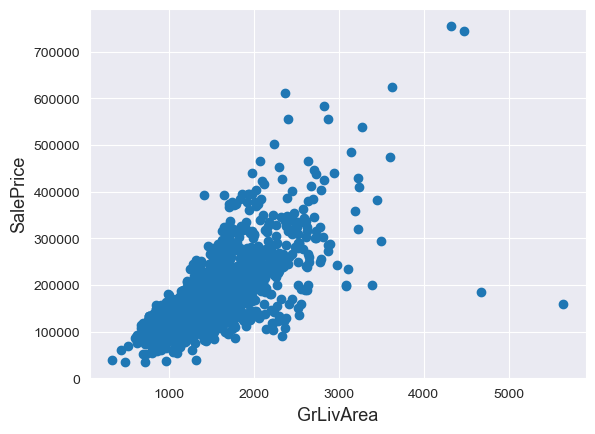

In [8]:
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.xlabel('GrLivArea',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.show()

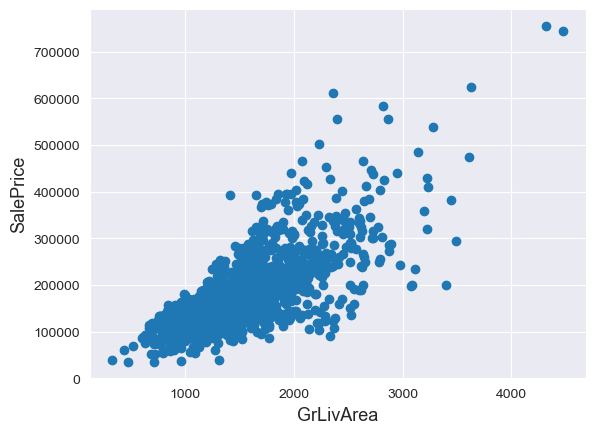

In [9]:
# Deleting Outliers
train=train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

# Check the graphic again
fig,ax=plt.subplots()
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()


 mu=180932.92 and sigma=79467.79 



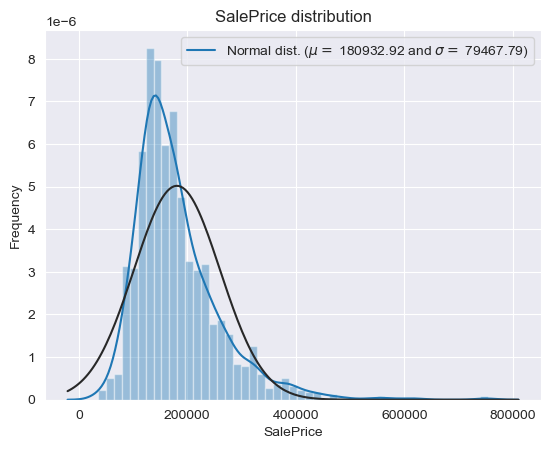

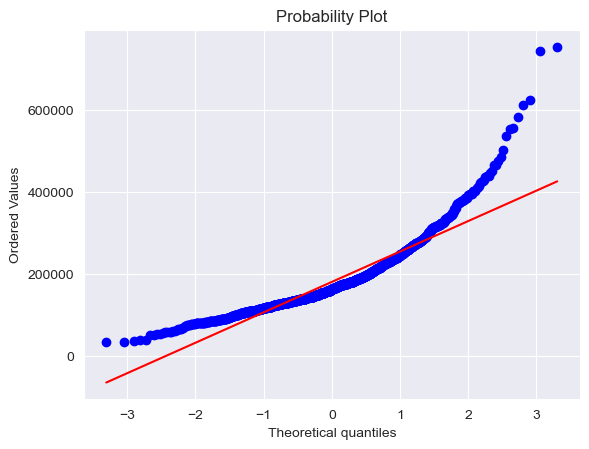

In [12]:
## Target Variable
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma)=norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma={:.2f} \n'.format(mu,sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()


 mu=12.02 and sigma=0.40 



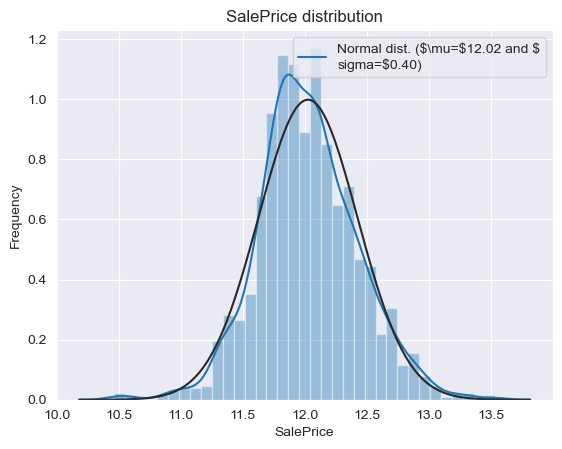

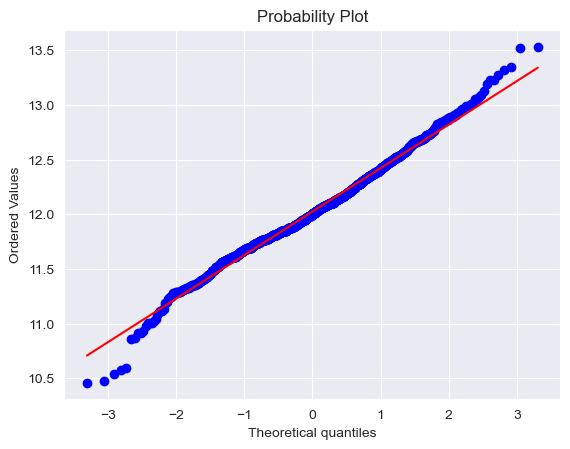

In [13]:
# the target is right skewed -> going to make it more normally distributed
# Use Log Transformation of the target variable
train['SalePrice']=np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm);
(mu,sigma)=norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma={:.2f} \n'.format(mu,sigma))
plt.legend(['Normal dist. ($\mu=${:.2f} and $\nsigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

## Feature Engineering

In [15]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print('all data size is {}'.format(all_data.shape))

all data size is (2917, 79)


In [16]:
# Missing data
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
missing_data=pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head()

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680


In [17]:
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

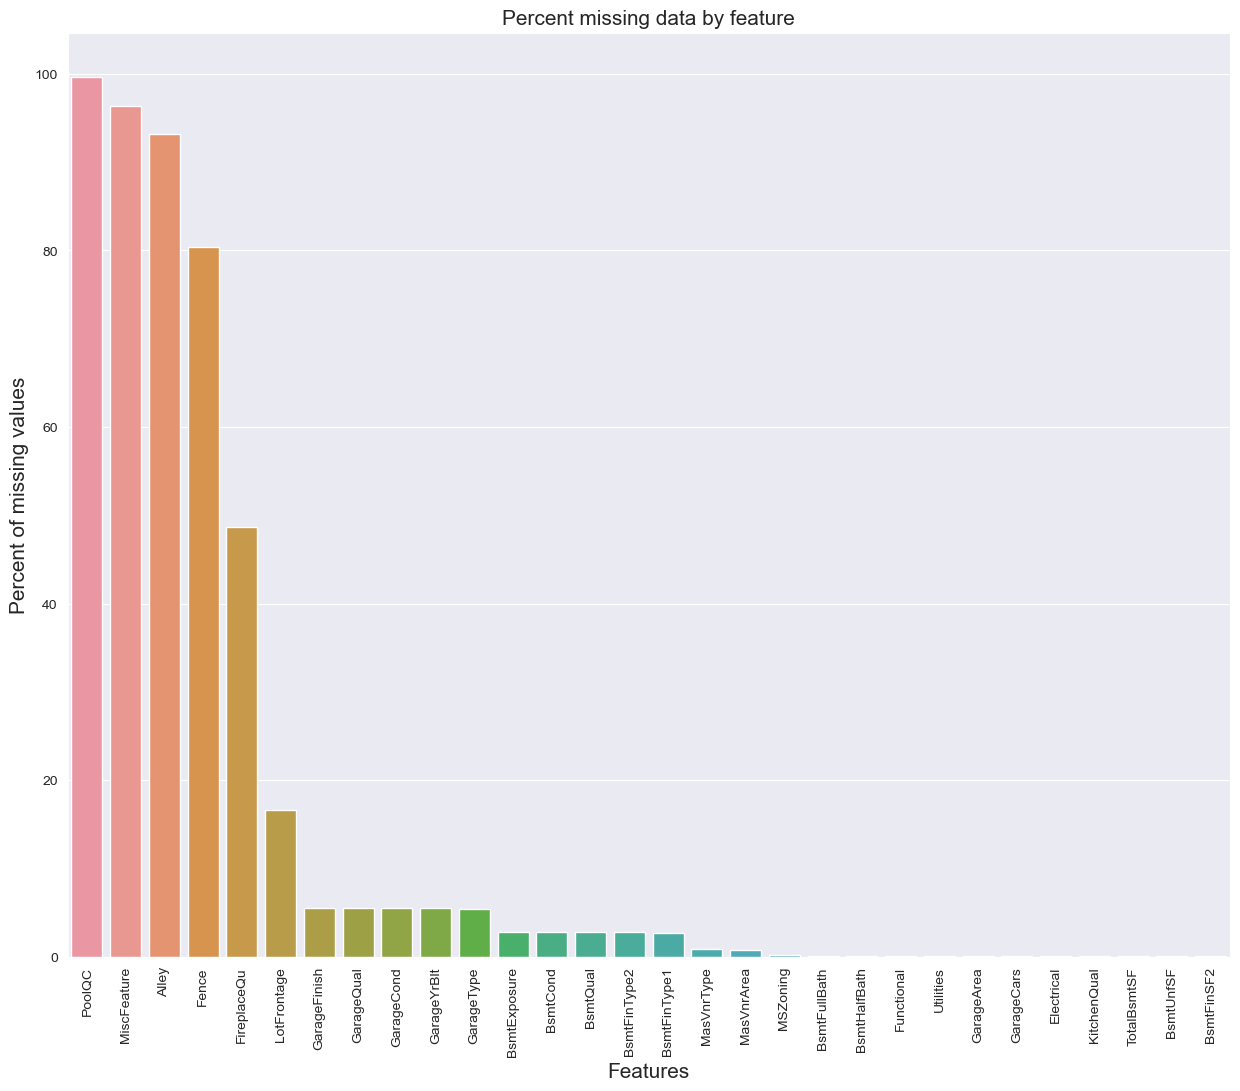

In [18]:
f,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of missing values',fontsize=15)
plt.title('Percent missing data by feature',fontsize=15)

<AxesSubplot:>

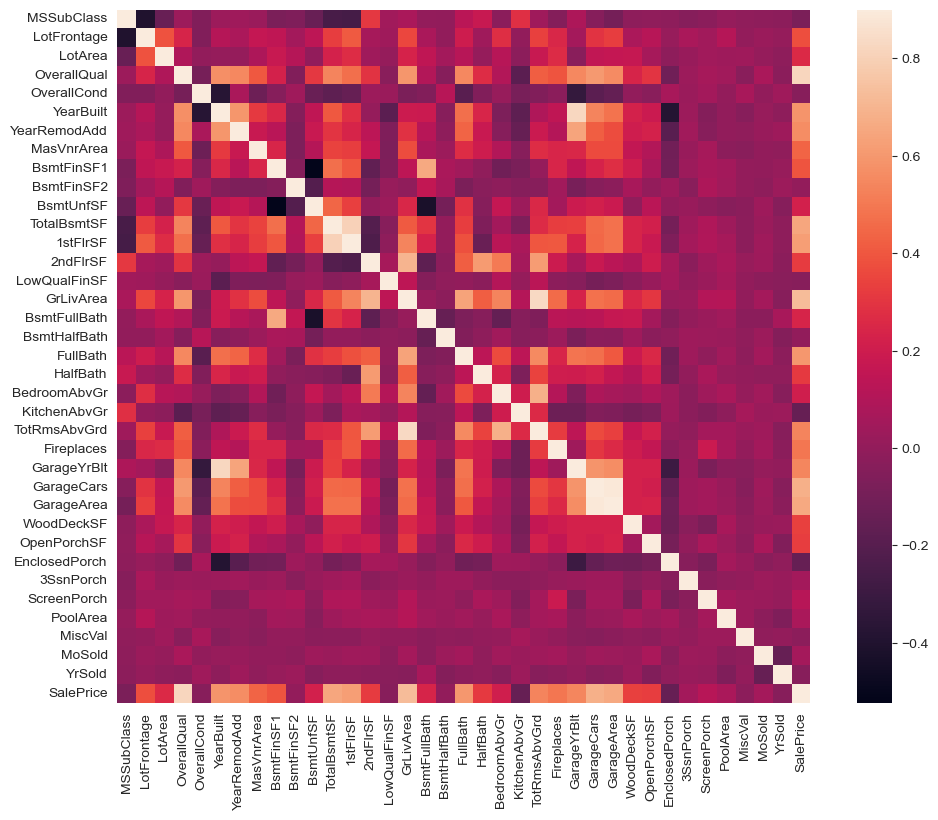

In [19]:
# Data Correlation
corrmat=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True)

In [22]:
# Imputing missing values
all_data['PoolQC']=all_data['PoolQC'].fillna('None')
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')
all_data['Alley']=all_data['Alley'].fillna('None')
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')
# fill in missing values by the median LogFrontage of the neighborhood
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
# replacing missing data with None
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
           all_data[col]=all_data[col].fillna('None')
# replacing missing data with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
# missing values are likley zero
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
# for categorical basement-related features, NaN means there is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
# fill out NA with 0 
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
# fill in missing values with 'RL' the most common value
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
# there are one different value and two NA. 
# This feature won't help in predictive modeling, safely remove it
all_data = all_data.drop(['Utilities'], axis=1)
# data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")
# It has one NA value. Since this feature has mostly 'SBrkr' -> set that for the missing value
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
# It has only one NA value, set the most frequent one
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
# It has only one missing value -> subsitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
# fll in again with most frequent value
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
# NA means No building class, replace missing value with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [24]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [25]:
# Check for any remaining missing value
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
missing_data=pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head()

,Missing Ratio


In [26]:
# it remains no missing value
# transforming some numerical variables that are really categorical
all_data['MSSubClass']=all_data['MSSubClass'].apply(str)
all_data['OverallCond']=all_data['OverallCond'].astype(str)
all_data['YrSold']=all_data['YrSold'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)

In [40]:
# Label Encoding some catergorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
    
print('Shape all data: {}'.format(all_data.shape))

Shape all data: (2917, 78)


In [42]:
# Adding one more important feature
# Since area related features are very important to determine house prices, 
# we add one more featue which is the total area of basement first and second floor areas of each house
all_data['TotalSF']=all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']
# Skew features
numeric_feats=all_data.dtypes[all_data.dtypes!='object'].index
# check the skew of all numerical features
skewed_feats=all_data[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
print('\n Skew in numerical features \n')
skewness=pd.DataFrame({'Skew':skewed_feats})
skewness.head(10)


 Skew in numerical features 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [43]:
# Box Cox Transformation of highly skewed features
skewness=skewness[abs(skewness)>0.75]
print('There are {} skewed numerical features to Box Coc transform'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15
for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)

There are 59 skewed numerical features to Box Coc transform


In [44]:
# Getting dummy categorical featuers
all_data=pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [45]:
# Getting the new train and test sets
train=all_data[:ntrain]
test=all_data[ntrain:]

## Modeling

In [47]:
# Importing libraries
from sklearn.linear_model import ElasticNet,Lasso,BayesianRidge,LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [48]:
# Use cross_val_score function of Sklearn
# Since this function has not a shuffle attribut, add one line code
# in order to shuffle the dataset prior to cross-validation
n_folds=5
def rmsle_cv(model):
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse=np.sqrt(-cross_val_score(model,train.values,y_train,scoring='neg_mean_squared_error',cv=kf))
    return(rmse)

## Base Models

In [56]:
# Lasso Regression
# > very sensitive to outliers -> make it more robust on them
lasso=make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))
# Elastic Net Regression
ENet=make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,l1_ratio=.9,random_state=3))
# Kernel Rigde Regression
KRR=KernelRidge(alpha=0.6,kernel='polynomial',degree=2,coef0=2.5)
# Gradient Boosting Regression
GBoost=GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,
                                max_depth=4,max_features='sqrt',
                                min_samples_leaf=15,min_samples_split=10,
                                loss='huber',random_state=5)
# XGBoost
model_xgb=xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0468,
                          learning_rate=0.05,max_depth=3,min_child_weight=1.7817,
                          n_estimators=2200,reg_alpha=0.4640,reg_lambda=0.8571,
                          subsample=0.5213,silent=1,
                          random_state=7,nthread=-1)

# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [58]:
# Base Models Scores
score=score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)

ElasticNet score: 0.1116 (0.0074)

Kernel Ridge score: 0.1153 (0.0075)

Gradient Boosting score: 0.1167 (0.0083)

[14:14:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[14:14:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[14:14:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[14:14:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[14:14:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 0.1164 (0.0070)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=

## Stacking model
simplest stacking approach: Average Basement models

build a new class to extend scikit-learn with our model and also to laverage cencapsulation and code reuse

In [59]:
# Average base model class
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # predictions for cloned models and average 
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [60]:
# Averaged base models score
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)



Less simple stacking: Adding a Meta-model

> add a meta-model on average bas model and use the out-of-folds predictions of these base models to train our meta-model

1. Split the total training set into two disjoint sets (train and hold out)
2. Train several base models on the first part (train)
3. Test these base models on the second part (holdout)
4. Use predictions from called out-of-folds predictions as the inputs and the correct responses as the outputs to train a higher level learner called meta-model

> after 5 iterations, that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4

Stacking averaged Models Class

In [61]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # fit the data on clones of the original models again
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models and create out-of-fold predictions
        # needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # train cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    # do predictions of all base models on test data and use averaged predictions as 
    # meta-features for the final prediction done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [62]:
## Stacking Average Models Score
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0073)


## Ensembling StackedRegressor, XGBoost, LightGBM

In [69]:
# Final Training and Prediction

# StackedRegressor
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print('StackedRegressor', rmsle(y_train, stacked_train_pred))

# XGBoost
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print('XGBoost',rmsle(y_train, xgb_train_pred))

# LIghtGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print('LightGBM',rmsle(y_train, lgb_train_pred))

StackedRegressor 0.07839506096665212
[10:50:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

XGBoost 0.07876050033097799
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
LightGBM 0.07169383068991829


In [63]:
# define rmsle evaluation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [68]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [72]:
ensemble

array([120681.12667881, 159204.89060733, 186522.94307569, ...,
       169534.78145939, 116002.55217937, 222140.69559378])